# Project: Wrangling and Analyze Data

## Data Gathering

In [1]:
# Importing packages
import pandas as pd
pd.set_option('display.max_columns', 40)

In [2]:
# Loading the data
rate_dogs = pd.read_csv('twitter-archive-enhanced.csv')
images = pd.read_csv('image-predictions.tsv', sep='\t')
tweets = pd.read_json('tweet-json.txt', lines=True)

## Assessing Data

In [3]:
rate_dogs.tail(3)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None
2355,666020888022790149,NaN,NaN,2015-11-15 22:32:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a Japanese Irish Setter. Lost eye...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666020888...,8,10,None,None,None,None,None


In [4]:
# Summary Information
rate_dogs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [5]:
rate_dogs.drop(['source','text', 'expanded_urls'], axis=1, inplace=True)

In [6]:
# Summary statistics
rate_dogs.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [7]:
# Checking rating_denominator column
denomiators = rate_dogs[['rating_numerator','rating_denominator']]
denomiators = denomiators[denomiators['rating_denominator'] != 10]
denomiators

,rating_numerator,rating_denominator
313,960,0
342,11,15
433,84,70
516,24,7
784,9,11
902,165,150
1068,9,11
1120,204,170
1165,4,20
1202,50,50


In [8]:
# Viewing image_prediction data
images.head(3)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True


In [9]:
# Summary Information
images.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [10]:
# Summary statistics
images.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [11]:
# Viewing Twitter API data
tweets.sample(3)

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,in_reply_to_user_id_str,in_reply_to_screen_name,user,geo,coordinates,place,contributors,is_quote_status,retweet_count,favorite_count,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status
1842,2015-12-13 01:25:37+00:00,675849018447167488,675849018447167488,This dog is being demoted to a 9/10 for not we...,False,"[0, 111]","{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,"<a href=""http://twitter.com/download/iphone"" r...",6.758457e+17,6.758457e+17,4.196984e+09,4.196984e+09,dog_rates,"{'id': 4196983835, 'id_str': '4196983835', 'na...",NaN,NaN,None,NaN,False,172,1027,False,False,NaN,NaN,en,NaN,NaN,NaN,NaN
1512,2016-01-24 02:48:07+00:00,691090071332753408,691090071332753408,Happy Saturday here's a dog in a mailbox. 12/1...,False,"[0, 71]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 691090043692322820, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,NaN,NaN,None,"{'id': 4196983835, 'id_str': '4196983835', 'na...",NaN,NaN,None,NaN,False,385,1867,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
948,2016-07-10 16:10:29+00:00,752173152931807232,752173152931807232,This is Brody. He's a lifeguard. Always prepar...,False,"[0, 108]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 752173142286692352, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,NaN,NaN,None,"{'id': 4196983835, 'id_str': '4196983835', 'na...",NaN,NaN,None,NaN,False,2106,6569,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN


In [12]:
# Summary statistics
tweets.describe()

,id,id_str,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,in_reply_to_user_id_str,geo,coordinates,contributors,retweet_count,favorite_count,possibly_sensitive,possibly_sensitive_appealable,quoted_status_id,quoted_status_id_str
count,2.354000e+03,2.354000e+03,7.800000e+01,7.800000e+01,7.800000e+01,7.800000e+01,0.0,0.0,0.0,2354.000000,2354.000000,2211.0,2211.0,2.900000e+01,2.900000e+01
mean,7.426978e+17,7.426978e+17,7.455079e+17,7.455079e+17,2.014171e+16,2.014171e+16,NaN,NaN,NaN,3164.797366,8080.968564,0.0,0.0,8.162686e+17,8.162686e+17
std,6.852812e+16,6.852812e+16,7.582492e+16,7.582492e+16,1.252797e+17,1.252797e+17,NaN,NaN,NaN,5284.770364,11814.771334,0.0,0.0,6.164161e+16,6.164161e+16
min,6.660209e+17,6.660209e+17,6.658147e+17,6.658147e+17,1.185634e+07,1.185634e+07,NaN,NaN,NaN,0.000000,0.000000,0.0,0.0,6.721083e+17,6.721083e+17
25%,6.783975e+17,6.783975e+17,6.757419e+17,6.757419e+17,3.086374e+08,3.086374e+08,NaN,NaN,NaN,624.500000,1415.000000,0.0,0.0,7.888183e+17,7.888183e+17
50%,7.194596e+17,7.194596e+17,7.038708e+17,7.038708e+17,4.196984e+09,4.196984e+09,NaN,NaN,NaN,1473.500000,3603.500000,0.0,0.0,8.340867e+17,8.340867e+17
75%,7.993058e+17,7.993058e+17,8.257804e+17,8.257804e+17,4.196984e+09,4.196984e+09,NaN,NaN,NaN,3652.000000,10122.250000,0.0,0.0,8.664587e+17,8.664587e+17
max,8.924206e+17,8.924206e+17,8.862664e+17,8.862664e+17,8.405479e+17,8.405479e+17,NaN,NaN,NaN,79515.000000,132810.000000,0.0,0.0,8.860534e+17,8.860534e+17


In [13]:
# Summary Information
tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 31 columns):
 #   Column                         Non-Null Count  Dtype              
---  ------                         --------------  -----              
 0   created_at                     2354 non-null   datetime64[ns, UTC]
 1   id                             2354 non-null   int64              
 2   id_str                         2354 non-null   int64              
 3   full_text                      2354 non-null   object             
 4   truncated                      2354 non-null   bool               
 5   display_text_range             2354 non-null   object             
 6   entities                       2354 non-null   object             
 7   extended_entities              2073 non-null   object             
 8   source                         2354 non-null   object             
 9   in_reply_to_status_id          78 non-null     float64            
 10  in_reply_to_status_id_st

### Quality issues
##### `rate_dogs` table

> 1. Inconsitency with rating_denominators

> 2. Rating of dogs ought to be scaled in a single column instead of having numerator and denominator separately

> 3. Renaming the `name` column as `dog_name` for better description

> 4. Extreme values in ratings both for numerators and denominators suggesting outliers

> 5. Erroneous data type for most column names    

##### `tweets` table

> 6. Drop unnecessary columns

> 7. Unmatching column name that will prevent merging of `tweet-json.txt` and `twitter-archive-enhanced` dataset (i.e id instead of tweet_id)

> 8. Erroneous data type for id column 
 

### Tidiness issues
> 1. All four values `doggo`,`floofer`,`pupper`,`puppo` ought to be in one column `dog_stage` from the 'twitter-archive-enhanced' dataset

> 2. All three datasets should be represented as one single dataset

## Cleaning Data

In [14]:
# Make copies of original pieces of data
rate_dogs_clean = rate_dogs.copy()
images_clean = images.copy()
tweets_clean = tweets.copy()

### Issue #1: Dog stages in different columns

#### Define: All four values `doggo`,`floofer`,`pupper`,`puppo` ought to be in one column `dog_stage` from the 'rate_dogs' table, applying string concat method and renaming the different stages (tidiness issue)

#### Code

In [15]:
rate_dogs_clean['dog_stage'] = rate_dogs_clean['doggo'].str.cat(rate_dogs_clean[['floofer','pupper','puppo']], sep='-')

In [16]:
rate_dogs_clean['dog_stage'].value_counts()

None-None-None-None        1976
None-None-pupper-None       245
doggo-None-None-None         83
None-None-None-puppo         29
doggo-None-pupper-None       12
None-floofer-None-None        9
doggo-None-None-puppo         1
doggo-floofer-None-None       1
Name: dog_stage, dtype: int64

In [17]:
rate_dogs_clean['dog_stage'] = rate_dogs_clean['dog_stage'].map({'None-None-None-None':'Stage_0', 'None-None-pupper-None':'Stage_3', 'doggo-None-None-None':'Stage_1',
                                 'None-None-None-puppo':'Stage_4','doggo-None-pupper-None':'Stage_1_3', 'None-floofer-None-None':'Stage_2',
                                 'doggo-None-None-puppo':'Stage_1_4', 'doggo-floofer-None-None':'Stage_1_2'})

In [18]:
rate_dogs_clean.drop(['doggo','floofer','pupper','puppo'], axis=1, inplace=True)

#### Test

In [19]:
rate_dogs_clean.sample(3)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,rating_numerator,rating_denominator,name,dog_stage
56,881536004380872706,NaN,NaN,2017-07-02 15:32:16 +0000,NaN,NaN,NaN,14,10,a,Stage_3
2341,666094000022159362,NaN,NaN,2015-11-16 03:22:39 +0000,NaN,NaN,NaN,9,10,None,Stage_0
1056,742161199639494656,NaN,NaN,2016-06-13 01:06:33 +0000,NaN,NaN,NaN,12,10,Doug,Stage_0


In [20]:
rate_dogs_clean.shape

(2356, 11)

### Quality

### Issue #2: Inconsitency with rating_denominators

#### Define: Filtering columns with denominator equal to 10

#### Code

In [21]:
rate_dogs_clean = rate_dogs_clean[rate_dogs_clean['rating_denominator'] == 10]

#### Test

In [22]:
rate_dogs_clean[rate_dogs_clean['rating_denominator'] != 10]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,rating_numerator,rating_denominator,name,dog_stage


In [23]:
rate_dogs_clean.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.333000e+03,7.300000e+01,7.300000e+01,1.800000e+02,1.800000e+02,2333.000000,2333.0
mean,7.429280e+17,7.456060e+17,2.152128e+16,7.722159e+17,1.248597e+16,12.237462,10.0
std,6.869187e+16,7.600519e+16,1.294404e+17,6.249820e+16,9.625580e+16,41.022472,0.0
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,10.0
25%,6.783802e+17,6.754971e+17,3.589728e+08,7.171759e+17,4.196984e+09,10.000000,10.0
50%,7.200432e+17,7.044857e+17,4.196984e+09,7.805335e+17,4.196984e+09,11.000000,10.0
75%,7.997580e+17,8.233264e+17,4.196984e+09,8.204234e+17,4.196984e+09,12.000000,10.0
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,10.0


### Issue #3: Dogs Rating 

#### Define: Rating of dogs by scaling the numerator and denominator columnn into one as percentage then drop the rating numerator and denominator columnn

#### Code

In [24]:
rate_dogs_clean['rating(%)'] = round(((rate_dogs_clean['rating_numerator']/rate_dogs_clean['rating_denominator'])*100),0)

In [25]:
rate_dogs_clean.drop(['rating_numerator', 'rating_denominator' ], axis=1, inplace=True)

#### Test

In [26]:
rate_dogs_clean.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'name', 'dog_stage', 'rating(%)'],
      dtype='object')

In [27]:
rate_dogs_clean.head(2)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,name,dog_stage,rating(%)
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,NaN,NaN,NaN,Phineas,Stage_0,130.0
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,NaN,NaN,NaN,Tilly,Stage_0,130.0


### Issue #4: Renaming column name

#### Define: Renaming the 'name' column as 'dog_name' using the .rename() method

#### Code

In [28]:
rate_dogs_clean.rename(columns={'name':'dog_name'}, inplace=True)

#### Test

In [29]:
rate_dogs_clean.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'dog_name', 'dog_stage', 'rating(%)'],
      dtype='object')

### Issue #5: Extreme values in ratings(%) suggesting outliers in the `twitter-archive-enhanced` dataset

#### Define: Using the interquartile range method for obtaining extreme values and dropping them

#### Code

In [30]:
import numpy as np
from scipy.stats import iqr
np.quantile(rate_dogs_clean['rating(%)'], [0, 0.25, 0.5, 0.75, 0.99, 1])

array([    0.,   100.,   110.,   120.,   140., 17760.])

In [31]:
# Finding outliers
import numpy as np
from scipy.stats import iqr
iqr = iqr(rate_dogs_clean['rating(%)'])
upper_threshold = np.quantile(rate_dogs_clean['rating(%)'], 0.99) + 1.5 * iqr

In [32]:
# printing the upper threshold
outliers = rate_dogs_clean[rate_dogs_clean['rating(%)'] > upper_threshold].index
outliers

Int64Index([188, 189, 290, 340, 695, 763, 979, 1712, 2074], dtype='int64')

In [33]:
rate_dogs_clean.drop(outliers, axis=0, inplace = True)

#### Test

In [34]:
rate_dogs_clean.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating(%)
count,2.324000e+03,7.000000e+01,7.000000e+01,1.790000e+02,1.790000e+02,2324.000000
mean,7.427723e+17,7.411339e+17,2.244362e+16,7.721349e+17,1.255572e+16,107.069707
std,6.865291e+16,7.437209e+16,1.321450e+17,6.266404e+16,9.652124e+16,21.797652
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000
25%,6.783394e+17,6.753863e+17,1.294955e+09,7.157203e+17,4.196984e+09,100.000000
50%,7.196279e+17,7.031489e+17,4.196984e+09,7.804657e+17,4.196984e+09,110.000000
75%,7.993373e+17,8.127522e+17,4.196984e+09,8.205322e+17,4.196984e+09,120.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,170.000000


### Issue #6: Erroneous data type for most column names in the dataset**

#### Define: Convert to the right datatype usig .astype() method, `tweet_id`, `in_reply_to_status_id`, `in_reply_to_user_id`, `retweeted_status_id`, `retweeted_status_user_id` to categorical data types and `timestamp`, `retweeted_status_timestamp` to datetime

#### Code

In [35]:
# To category
rate_dogs_clean.tweet_id = rate_dogs_clean.tweet_id.astype('category')
rate_dogs_clean.in_reply_to_status_id = rate_dogs_clean.in_reply_to_status_id.astype('category')
rate_dogs_clean.in_reply_to_user_id = rate_dogs_clean.in_reply_to_user_id.astype('category')
rate_dogs_clean.retweeted_status_id = rate_dogs_clean.retweeted_status_id.astype('category')
rate_dogs_clean.retweeted_status_user_id = rate_dogs_clean.retweeted_status_user_id.astype('category')

# To datetime
rate_dogs_clean.timestamp = pd.to_datetime(rate_dogs_clean.timestamp)
rate_dogs_clean.retweeted_status_timestamp = pd.to_datetime(rate_dogs_clean.retweeted_status_timestamp)

#### Test

In [36]:
rate_dogs_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2324 entries, 0 to 2355
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    2324 non-null   category           
 1   in_reply_to_status_id       70 non-null     category           
 2   in_reply_to_user_id         70 non-null     category           
 3   timestamp                   2324 non-null   datetime64[ns, UTC]
 4   retweeted_status_id         179 non-null    category           
 5   retweeted_status_user_id    179 non-null    category           
 6   retweeted_status_timestamp  179 non-null    datetime64[ns, UTC]
 7   dog_name                    2324 non-null   object             
 8   dog_stage                   2324 non-null   object             
 9   rating(%)                   2324 non-null   float64            
dtypes: category(5), datetime64[ns, UTC](2), float64(1), object(2

### Issue #7: Unnecessary columns

#### Define: Filter colums to be used for analysis such as  'id', 'retweet_count', and 'favorite_count'

#### Code: 

In [37]:
tweets_clean = tweets_clean[['id', 'retweet_count', 'favorite_count']]

### Issue #8: Unmatching column name that will prevent merging of rate_dogs with tweets table

#### Define: Remaning the unmatching column name that will prevent merging of `tweets` and `rate_dogs` table (i.e id instead of tweet_id)

#### Code

In [38]:
tweets_clean.rename(columns={'id':'tweet_id'}, inplace=True)

#### Test

In [39]:
tweets_clean.columns

Index(['tweet_id', 'retweet_count', 'favorite_count'], dtype='object')

### Issue #9: Erroneous data type for id column

#### Define: Convert tweet_id column to categorical datatype 

#### Code

In [40]:
tweets_clean.tweet_id = tweets_clean.tweet_id.astype('category')

#### Test

In [41]:
tweets_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   tweet_id        2354 non-null   category
 1   retweet_count   2354 non-null   int64   
 2   favorite_count  2354 non-null   int64   
dtypes: category(1), int64(2)
memory usage: 124.4 KB


### Issue #10(Tidiness): Datasets in different tables

#### Define: Merge three datasets into one master dataset

#### Code

In [42]:
rate_dogs_clean = pd.merge(rate_dogs_clean, tweets_clean,
                            on=['tweet_id'], how='left')

In [43]:
rate_dogs_clean = pd.merge(rate_dogs_clean, images_clean,
                            on=['tweet_id'], how='left')

#### Test

In [44]:
rate_dogs_clean.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,dog_name,dog_stage,rating(%),retweet_count,favorite_count,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56+00:00,NaN,NaN,NaT,Phineas,Stage_0,130.0,8853.0,39467.0,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1.0,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27+00:00,NaN,NaN,NaT,Tilly,Stage_0,130.0,6514.0,33819.0,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1.0,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03+00:00,NaN,NaN,NaT,Archie,Stage_0,120.0,4328.0,25461.0,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1.0,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51+00:00,NaN,NaN,NaT,Darla,Stage_0,130.0,8964.0,42908.0,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1.0,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24+00:00,NaN,NaN,NaT,Franklin,Stage_0,120.0,9774.0,41048.0,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2.0,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True


## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [45]:
rate_dogs_clean.to_csv('twitter_archive_master.csv', index=False)

## Analyzing and Visualizing Data

In [46]:
twitter_df = pd.read_csv('twitter_archive_master.csv')
twitter_df

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,dog_name,dog_stage,rating(%),retweet_count,favorite_count,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56+00:00,NaN,NaN,NaN,Phineas,Stage_0,130.0,8853.0,39467.0,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1.0,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27+00:00,NaN,NaN,NaN,Tilly,Stage_0,130.0,6514.0,33819.0,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1.0,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03+00:00,NaN,NaN,NaN,Archie,Stage_0,120.0,4328.0,25461.0,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1.0,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51+00:00,NaN,NaN,NaN,Darla,Stage_0,130.0,8964.0,42908.0,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1.0,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24+00:00,NaN,NaN,NaN,Franklin,Stage_0,120.0,9774.0,41048.0,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2.0,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2319,666049248165822465,NaN,NaN,2015-11-16 00:24:50+00:00,NaN,NaN,NaN,None,Stage_0,50.0,41.0,111.0,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1.0,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
2320,666044226329800704,NaN,NaN,2015-11-16 00:04:52+00:00,NaN,NaN,NaN,a,Stage_0,60.0,147.0,311.0,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1.0,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
2321,666033412701032449,NaN,NaN,2015-11-15 23:21:54+00:00,NaN,NaN,NaN,a,Stage_0,90.0,47.0,128.0,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1.0,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
2322,666029285002620928,NaN,NaN,2015-11-15 23:05:30+00:00,NaN,NaN,NaN,a,Stage_0,70.0,48.0,132.0,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1.0,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True


##### Splitting timestamp into days, month and year

In [47]:
# using split
twitter_df[['tweet_year','tweet_month','tweet_day']] = twitter_df['timestamp'].str.split('-', expand=True)

In [48]:
twitter_df.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,dog_name,dog_stage,rating(%),retweet_count,favorite_count,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,tweet_year,tweet_month,tweet_day
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56+00:00,NaN,NaN,NaN,Phineas,Stage_0,130.0,8853.0,39467.0,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1.0,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False,2017,08,01 16:23:56+00:00
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27+00:00,NaN,NaN,NaN,Tilly,Stage_0,130.0,6514.0,33819.0,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1.0,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True,2017,08,01 00:17:27+00:00
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03+00:00,NaN,NaN,NaN,Archie,Stage_0,120.0,4328.0,25461.0,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1.0,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True,2017,07,31 00:18:03+00:00
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51+00:00,NaN,NaN,NaN,Darla,Stage_0,130.0,8964.0,42908.0,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1.0,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False,2017,07,30 15:58:51+00:00
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24+00:00,NaN,NaN,NaN,Franklin,Stage_0,120.0,9774.0,41048.0,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2.0,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,2017,07,29 16:00:24+00:00


In [49]:
twitter_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2324 entries, 0 to 2323
Data columns (total 26 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2324 non-null   int64  
 1   in_reply_to_status_id       70 non-null     float64
 2   in_reply_to_user_id         70 non-null     float64
 3   timestamp                   2324 non-null   object 
 4   retweeted_status_id         179 non-null    float64
 5   retweeted_status_user_id    179 non-null    float64
 6   retweeted_status_timestamp  179 non-null    object 
 7   dog_name                    2324 non-null   object 
 8   dog_stage                   2324 non-null   object 
 9   rating(%)                   2324 non-null   float64
 10  retweet_count               2322 non-null   float64
 11  favorite_count              2322 non-null   float64
 12  jpg_url                     2052 non-null   object 
 13  img_num                     2052 

In [50]:
twitter_df['tweet_year'] = twitter_df['tweet_year'].astype(int)
twitter_df['tweet_month'] = twitter_df['tweet_month'].astype(int)

### Research Question 1: What month and year do we have the highest and lowest tweets?

#### Tweets by month and year

In [51]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(rc={'figure.figsize':(12,4)})

In [52]:
twitter_df['tweet_month'] = twitter_df['tweet_month'].map({1:'Jan', 2:'Feb', 3:'Mar', 4:'Apr', 5:'May', 6:'Jun', 7:'Jul', 8:'Aug', 9:'Sep', 10:'Oct', 11:'Nov', 12:'Dec'})

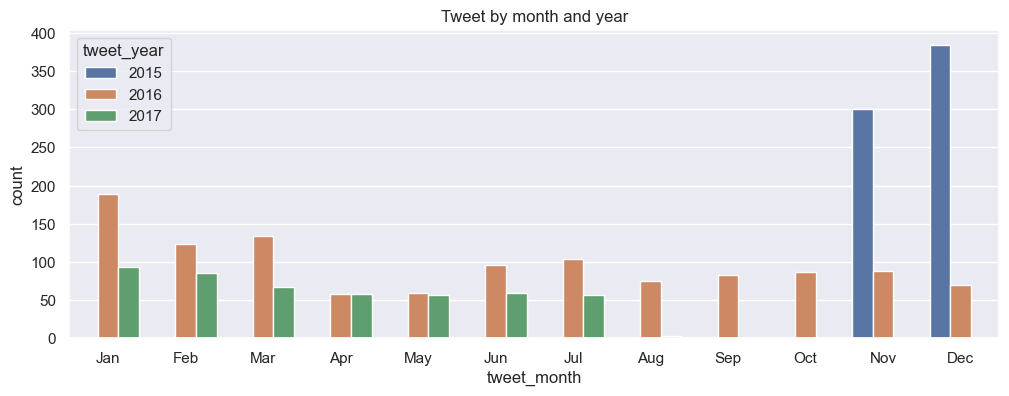

In [53]:
month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
sns.countplot(x='tweet_month', hue="tweet_year", order=month_names, data=twitter_df).set_title('Tweet by month and year');

### Research Question 2: Which dogs have the highest average ratings?

#### Checking average dog rates by dog name

In [54]:
dog_rate_df = twitter_df[['dog_name', 'dog_stage', 'rating(%)','retweet_count', 'favorite_count',]]
rating = dog_rate_df.groupby('dog_name').mean()['rating(%)'].sort_values(ascending=False).head(15)
rating

C:\Users\user\AppData\Local\Temp\ipykernel_7432\1522286353.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  rating = dog_rate_df.groupby('dog_name').mean()['rating(%)'].sort_values(ascending=False).head(15)


dog_name
Laika        140.0
Clifford     140.0
Cermet       140.0
Doobert      140.0
Iggy         140.0
Emmy         140.0
General      140.0
Sundance     140.0
Smiley       140.0
such         140.0
Kuyu         140.0
Beya         130.0
Rumpole      130.0
Tonks        130.0
Shnuggles    130.0
Name: rating(%), dtype: float64

In [55]:
twitter_df[twitter_df['dog_name'] == 'Charlie'][['dog_name','jpg_url']]

,dog_name,jpg_url
228,Charlie,NaN
252,Charlie,https://pbs.twimg.com/media/C7iNfq1W0AAcbsR.jpg
259,Charlie,https://pbs.twimg.com/media/C7JkO0rX0AErh7X.jpg
322,Charlie,https://pbs.twimg.com/media/C5JYaYoVYAAcEQw.jpg
334,Charlie,https://pbs.twimg.com/media/C40r_GDWAAA5vNJ.jpg
377,Charlie,https://pbs.twimg.com/media/C3rN-lcWEAA9CmR.jpg
802,Charlie,https://pbs.twimg.com/media/CrOBSfgXgAABsTE.jpg
920,Charlie,https://pbs.twimg.com/media/CnbJuPoXEAAjcVF.jpg
1337,Charlie,https://pbs.twimg.com/media/CcLq7ipW4AArSGZ.jpg
1414,Charlie,https://pbs.twimg.com/media/Ca0lzzmWwAA5u56.jpg


<AxesSubplot: title={'center': 'Top Fifteen dog_names with average rating(%)'}, xlabel='Average_Rating', ylabel='Dog_Names'>

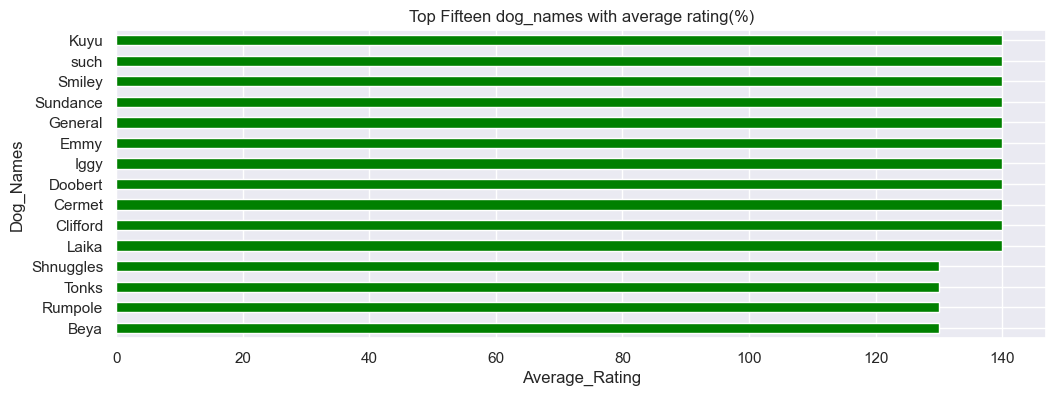

In [56]:
rating.sort_values(ascending=True).plot(kind='barh',color='green', title='Top Fifteen dog_names with average rating(%)', xlabel='Average_Rating', ylabel='Dog_Names')

### Research Question 3: Which dog has the highest retweets and likes(favorite) count?

#### Visualizing Retweet counts and Favourite counts

In [57]:
# Checking the number of dogs with missing names
twitter_df.groupby('dog_name').sum()[['retweet_count','favorite_count']].sort_values(by='retweet_count').tail(5)

C:\Users\user\AppData\Local\Temp\ipykernel_7432\2620778936.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  twitter_df.groupby('dog_name').sum()[['retweet_count','favorite_count']].sort_values(by='retweet_count').tail(5)


,retweet_count,favorite_count
dog_name,,
Sunny,68005.0,89475.0
Buddy,75752.0,77940.0
Stephan,113250.0,107015.0
Bo,124561.0,185922.0
None,2357894.0,5294495.0


In [58]:
# Filtering dog_names not missing
dog_name_df = dog_rate_df[dog_rate_df['dog_name'] != 'None']

C:\Users\user\AppData\Local\Temp\ipykernel_7432\1176255557.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  dog_name_df.groupby('dog_name').sum()['retweet_count'].sort_values(ascending=False).head(10).plot(kind='barh', color='green', ax=axes[0])
C:\Users\user\AppData\Local\Temp\ipykernel_7432\1176255557.py:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  dog_name_df.groupby('dog_name').sum()['favorite_count'].sort_values(ascending=False).head(10).plot(kind='barh', color='green', ax=axes[1])


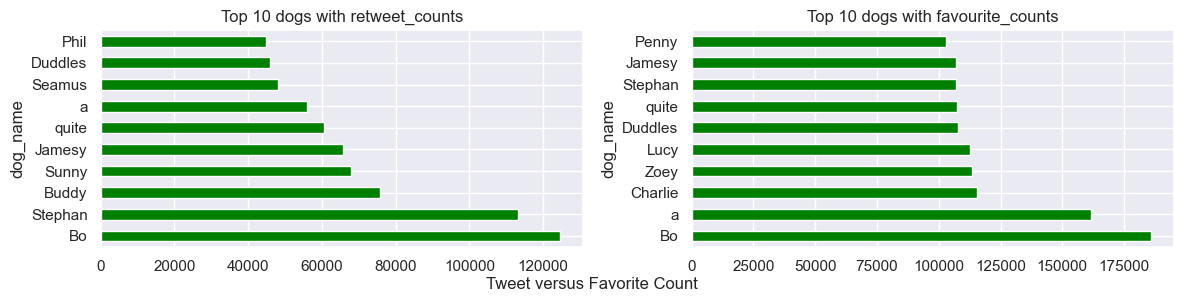

In [59]:
fig, axes = plt.subplots(1,2, figsize=(12,3))

dog_name_df.groupby('dog_name').sum()['retweet_count'].sort_values(ascending=False).head(10).plot(kind='barh', color='green', ax=axes[0])
dog_name_df.groupby('dog_name').sum()['favorite_count'].sort_values(ascending=False).head(10).plot(kind='barh', color='green', ax=axes[1])
 
axes[0].set_title('Top 10 dogs with retweet_counts')
axes[1].set_title('Top 10 dogs with favourite_counts')

fig.text(0.5, 0.01, 'Tweet versus Favorite Count', ha='center')
plt.tight_layout()

### Insights:
> 1. From the countplot showing tweets by year and month it can be observed that the WeRateDog tweets campaign had it highest engagement the the second month of it's commencment(i.e Dec 2015)and the lowest in the last month of the campaign (July 2017)

> 2. There seems to be a high level of tie in the dog average ratings suggesting the dogs are quite wonderful

> 3. There's a level of relationships between sum of retweet and favourite counts, with dog Bo having the highest sum in both the retweet and favorite count. Also a large sum of dog names were missing.

### Rersearch Question 4: What type of relationhip do we have between the retweet and favorite count?

### Visualization

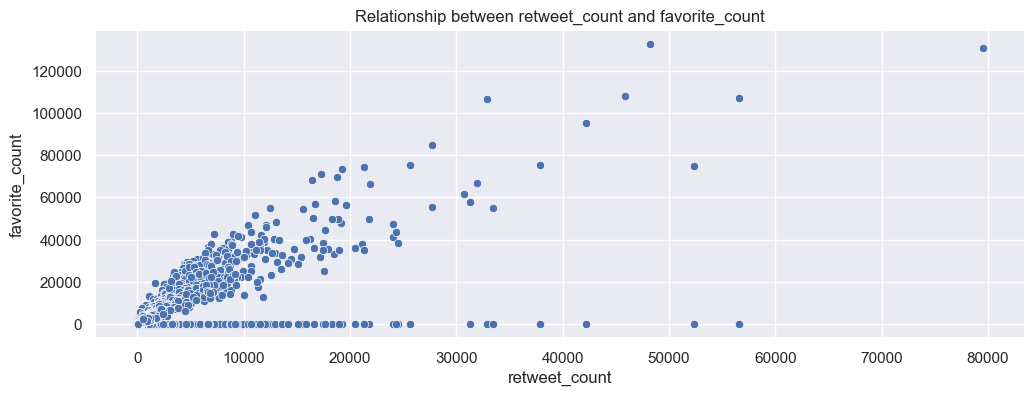

In [60]:
sns.scatterplot(twitter_df,x='retweet_count',y='favorite_count').set(title='Relationship between retweet_count and favorite_count');

In [61]:
# Checking the relationship between retweet and favorite count
twitter_df['retweet_count'].corr(twitter_df['favorite_count'])

0.7026660579452872

#### Conclusion: A dog with greater retweets tends to have greater likes(favorite as well)